# Principal Component Analysis with Cancer Data

In [235]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [236]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [237]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [238]:
cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [239]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [240]:
# We could see "?" values in column, this should be removed from data set
print(cancer_df['Bare Nuclei'].unique())# '?' is present in the cancer_df.

# Check for missing value in any other column
print(cancer_df.isna().sum())
print(cancer_df.isnull().sum())


['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64
ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [241]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer_df[cancer_df['Bare Nuclei'] == '?']['Bare Nuclei'].count() # shows the number of missing values in the used column

16

In [242]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [243]:
'''Since we can see the value 1 has 402 occureneces so we can use value instead if ?'''
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].replace('?', '1')
cancer_df['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [244]:
print(cancer_df[cancer_df.duplicated()].count())
df = cancer_df.drop_duplicates(keep='first')
df.shape

ID                             9
ClumpThickness                 9
Cell Size                      9
Cell Shape                     9
Marginal Adhesion              9
Single Epithelial Cell Size    9
Bare Nuclei                    9
Normal Nucleoli                9
Bland Chromatin                9
Mitoses                        9
Class                          9
dtype: int64


(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [245]:
# Check for correlation of variable

In [246]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')
df.dtypes

C:\swdtools\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [247]:
#As suggested ID is of not much importance in the data from data analysis perpose hence removing it
data = df.drop('ID', axis=1)
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


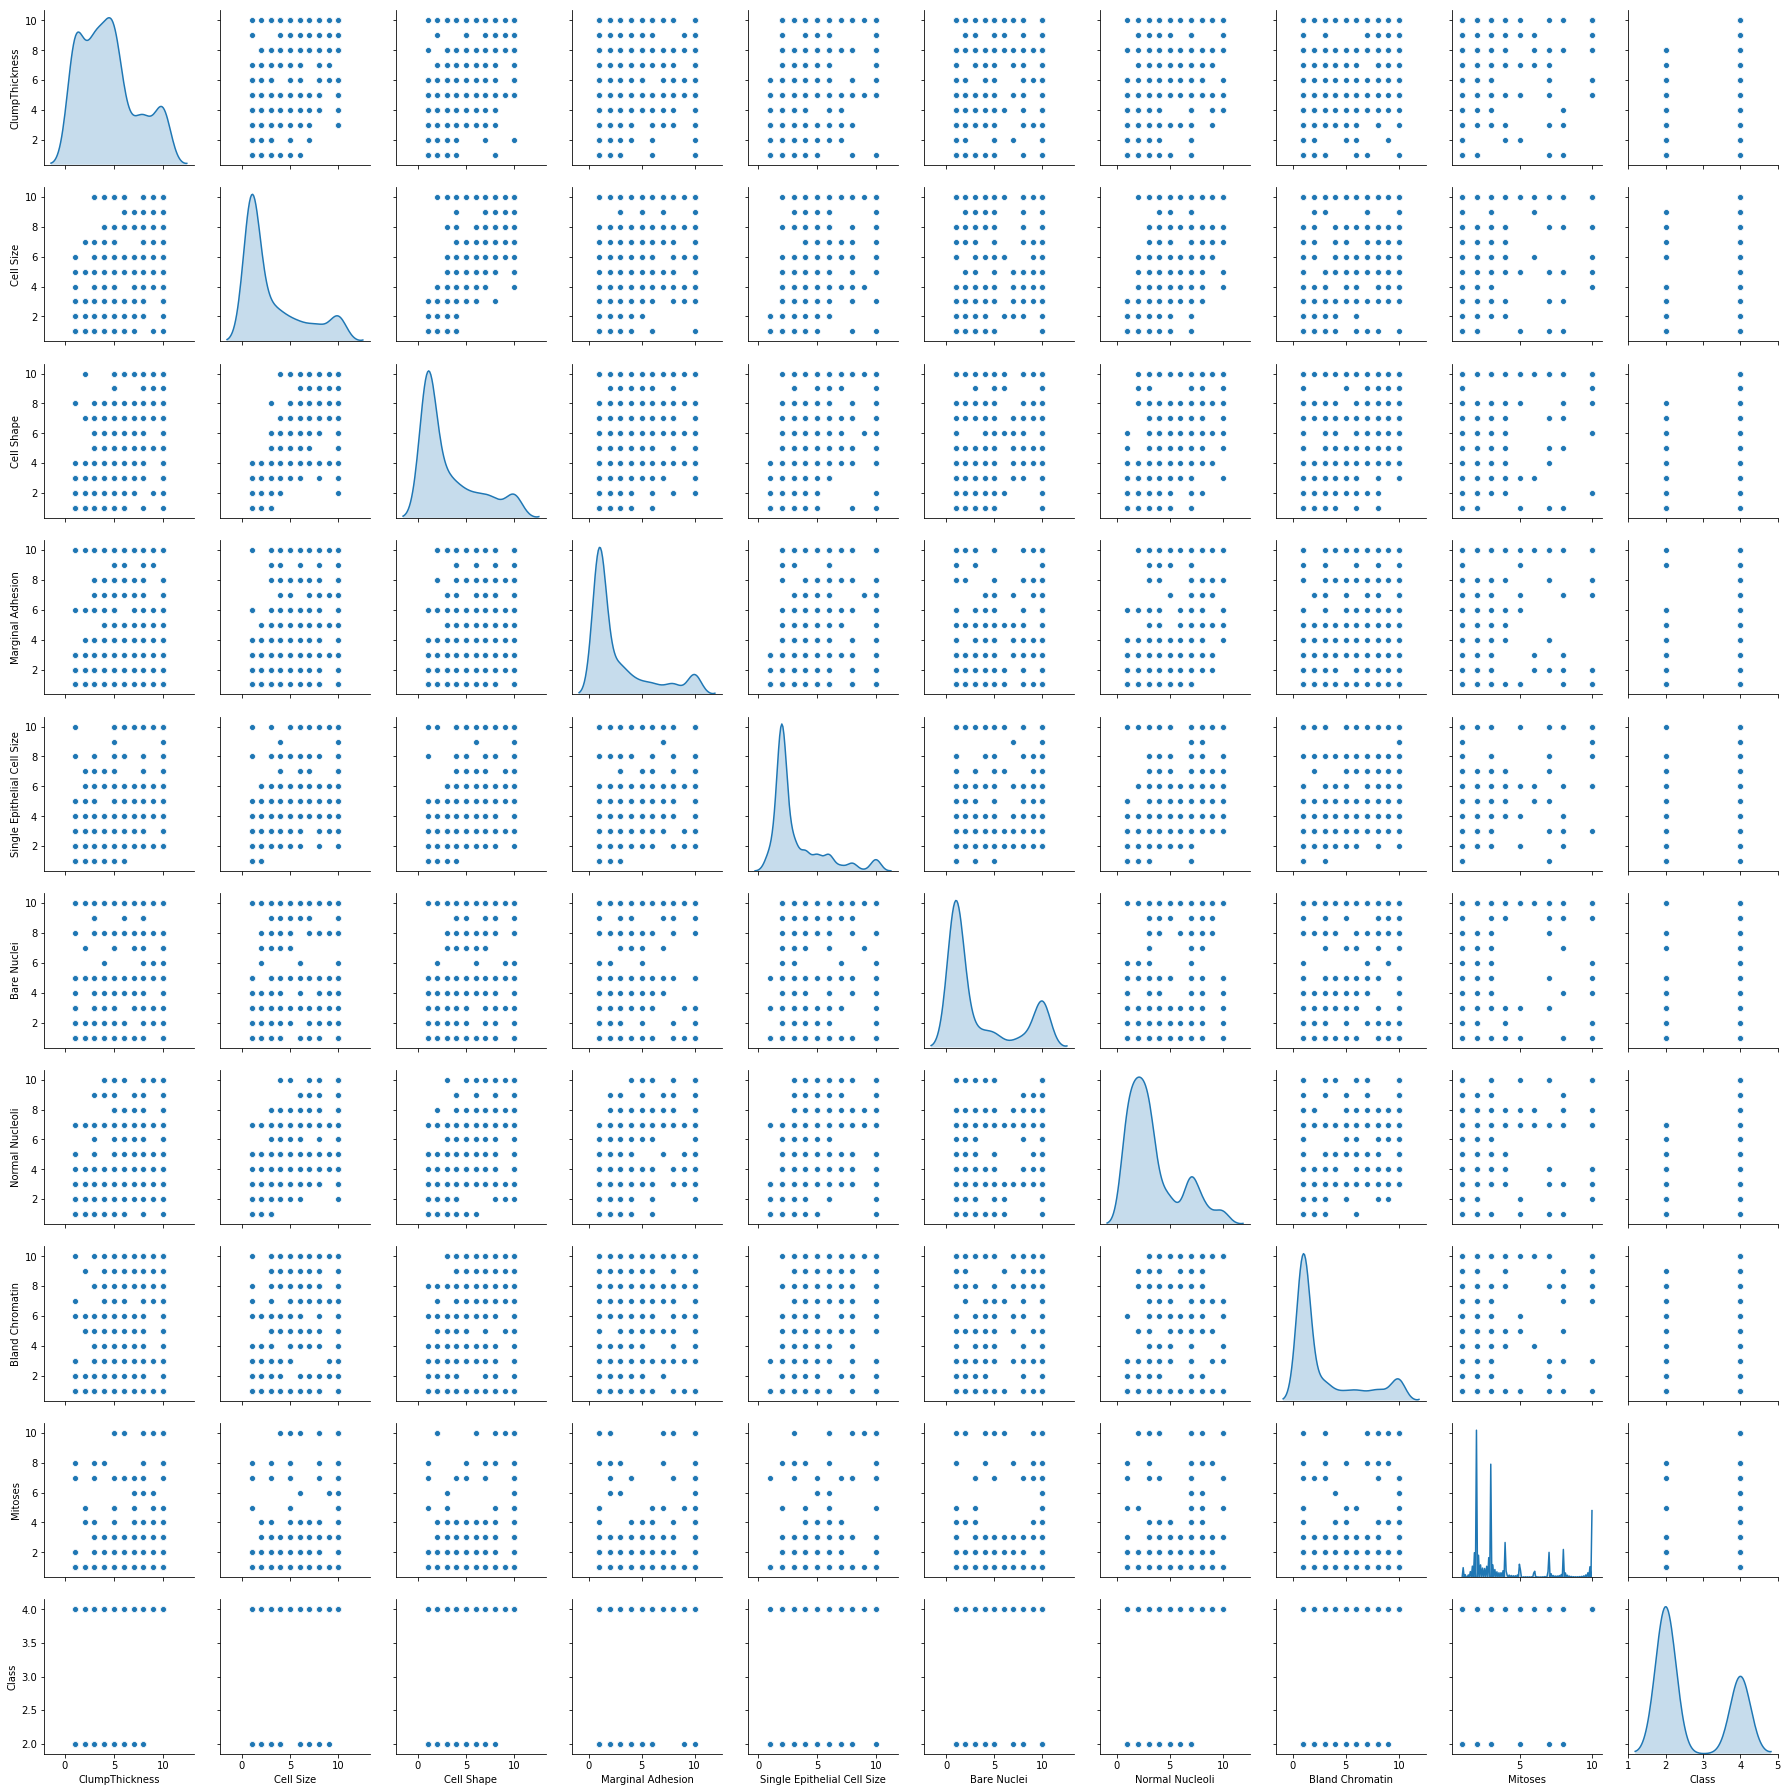

In [248]:
sns.pairplot(data,  diag_kind='kde')

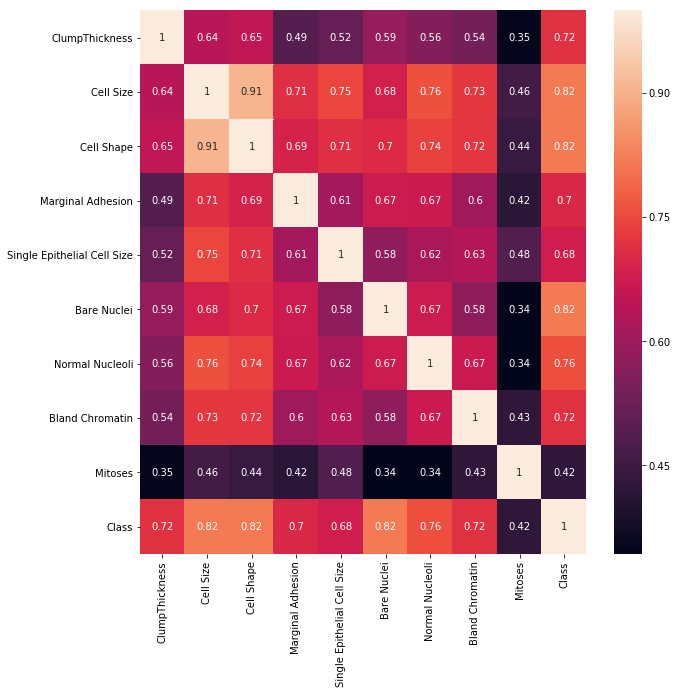

In [249]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

In [250]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [251]:
#Let us check for pair plots

In [252]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [253]:
# We could see most of the outliers are now removed.

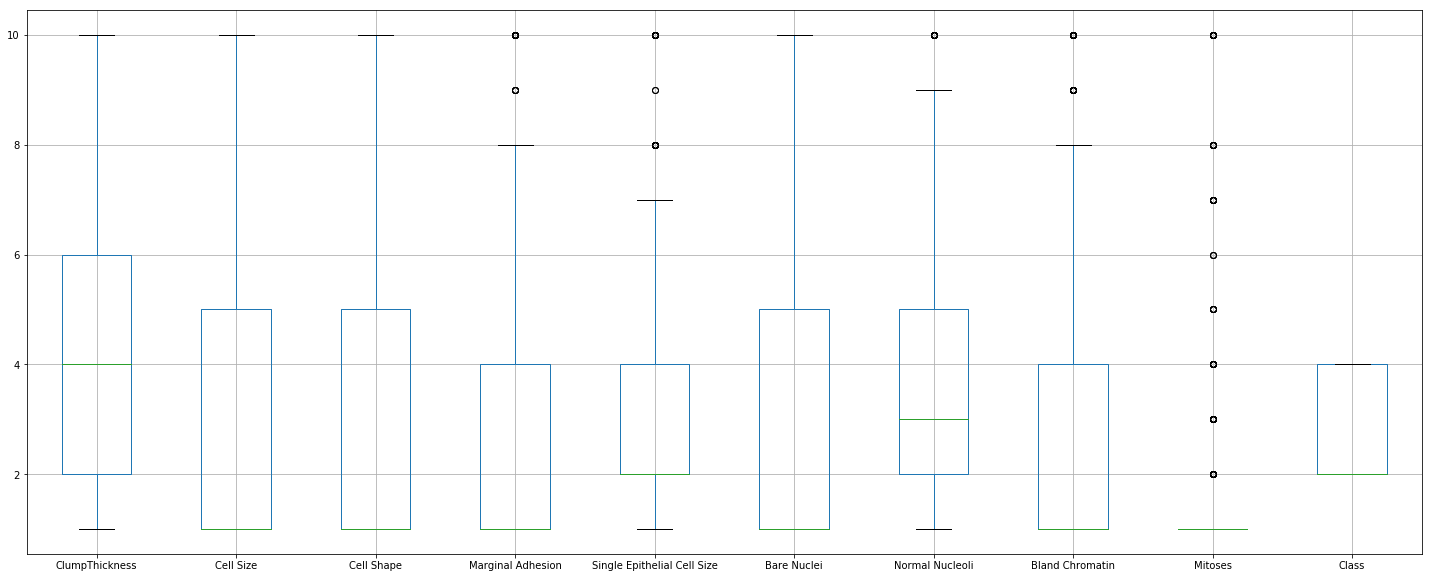

In [254]:
data.boxplot(figsize=(25,10))

In [255]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # deriving the IQR

ClumpThickness                 4.0
Cell Size                      4.0
Cell Shape                     4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Normal Nucleoli                3.0
Bland Chromatin                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64


In [256]:
for i in data.columns:
    up_whisk= data[i].quantile(0.75)+1.5*(data[i].quantile(0.75) - data[i].quantile(0.25))
    for j in data[i]:
        if(j > up_whisk):
            data[i]=data[i].replace(j,up_whisk)

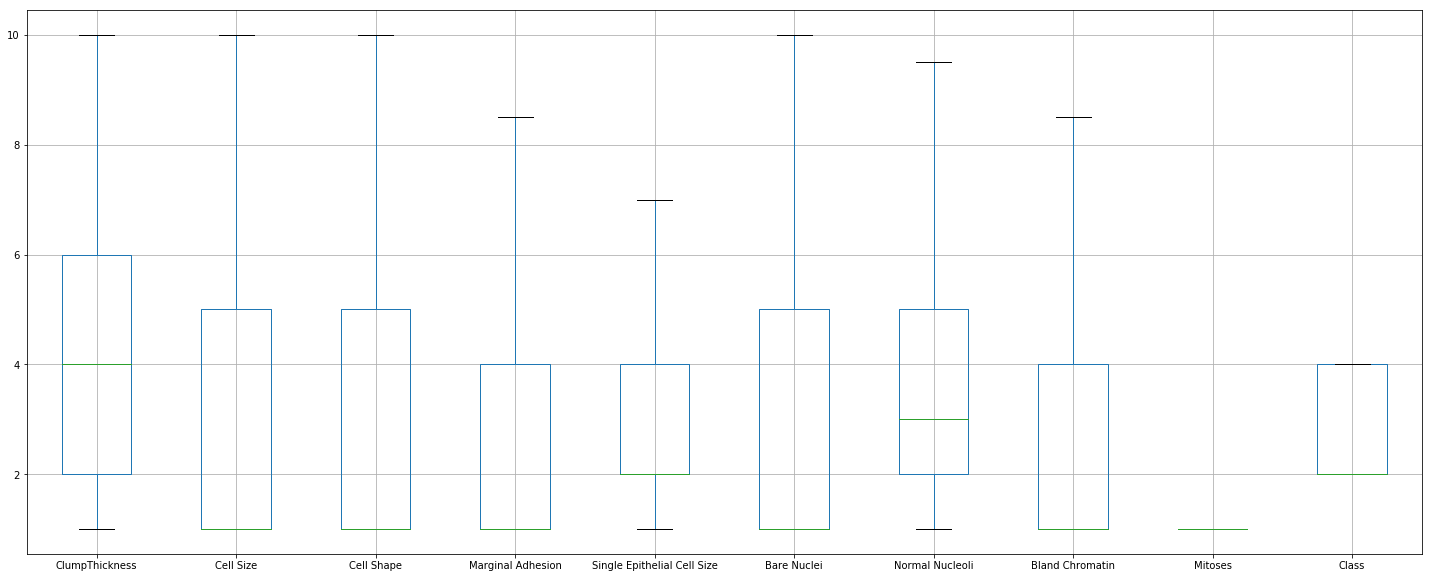

In [257]:
data.boxplot(figsize=(25,10))

In [258]:
X = data.drop('Class', axis = 1)
y= data['Class']
X.dtypes

ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion              float64
Single Epithelial Cell Size      int64
Bare Nuclei                      int64
Normal Nucleoli                float64
Bland Chromatin                float64
Mitoses                          int64
dtype: object

# Q6 Create a covariance matrix for identifying Principal components

In [259]:
# PCA
# Step 1 - Create covariance matrix


In [260]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.50167717 0.54660373 0.59150555
  0.56498384 0.54618447 0.        ]
 [0.64410677 1.00145138 0.9066632  0.72800861 0.78174972 0.68556472
  0.76104659 0.73121148 0.        ]
 [0.65453792 0.9066632  1.00145138 0.70364309 0.75160088 0.70518656
  0.7400641  0.72792357 0.        ]
 [0.50167717 0.72800861 0.70364309 1.00145138 0.66418897 0.68583363
  0.68518449 0.62551067 0.        ]
 [0.54660373 0.78174972 0.75160088 0.66418897 1.00145138 0.6263289
  0.65988131 0.68920344 0.        ]
 [0.59150555 0.68556472 0.70518656 0.68583363 0.6263289  1.00145138
  0.67794772 0.59581302 0.        ]
 [0.56498384 0.76104659 0.7400641  0.68518449 0.65988131 0.67794772
  1.00145138 0.6767848  0.        ]
 [0.54618447 0.73121148 0.72792357 0.62551067 0.68920344 0.59581302
  0.6767848  1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


C:\swdtools\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\swdtools\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q7 Identify eigen values and eigen vector

In [261]:
# Step 2- Get eigen values and eigen vector

In [262]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.30807853 -0.88645506 -0.00100346  0.04586918  0.19894213 -0.02931434
   0.27546611  0.02934579  0.        ]
 [ 0.38687872  0.04328544 -0.73870659  0.18714417 -0.35942906 -0.18962659
  -0.05421039 -0.31568118  0.        ]
 [ 0.38373285 -0.02167253  0.65949832  0.16072785 -0.53350564 -0.15545199
  -0.12702241 -0.25803031  0.        ]
 [ 0.34538274  0.33855378  0.05337579 -0.43941103  0.03282872 -0.19300708
   0.72828763  0.03779871  0.        ]
 [ 0.35382608  0.2110513   0.0797925   0.31842574  0.57062536 -0.54339684
  -0.25900814  0.18580642  0.        ]
 [ 0.34273109 -0.08927064 -0.07766991 -0.63976281 -0.1379223   0.04446369
  -0.50552768  0.42740996  0.        ]
 [ 0.35639767  0.12714708  0.05960212 -0.13899507  0.43429145  0.54876663
  -0.16122282 -0.5640883   0.        ]
 [ 0.34524708  0.16898864 -0.02393089  0.46254357 -0.11082357  0.55078437
   0.16126326  0.54412952  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [263]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 71.63961158  78.36326863  84.06965223  88.29404289  92.12221044
  95.72753464  98.87411068 100.         100.        ]


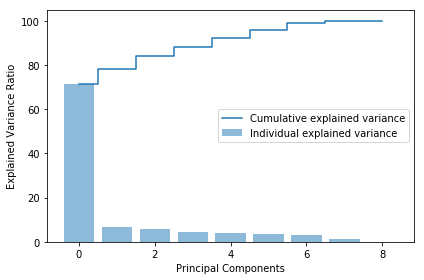

In [264]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()



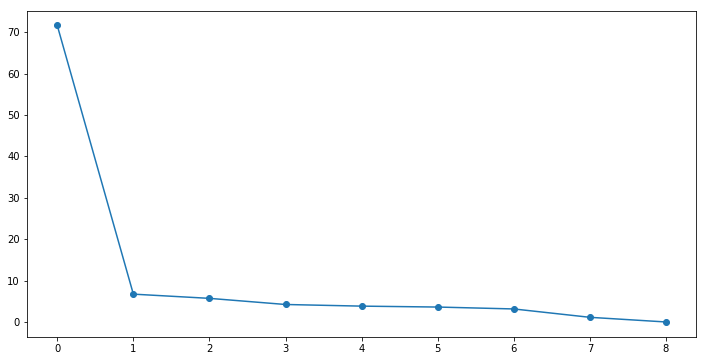

In [265]:
'''Plotting Elbow/ Scree Plot'''
plt.figure(figsize=(12,6))
plt.plot( var_exp, marker = "o" )

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [266]:
from sklearn.decomposition import PCA

In [290]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'
                         ,'principal component 5', 'principal component 6'])
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-4.227354,0.215150,-1.857678,-0.106868,-0.784966,-1.043962
1,5.073262,-4.868041,0.849460,0.880881,0.449003,1.975382
2,-4.392022,-0.691721,0.010988,-0.173856,0.020950,-1.022254
3,5.466398,3.939746,-0.897633,-0.937880,4.120392,1.509041
4,-3.911687,0.039095,-0.276804,0.457348,-2.074520,-0.487853
5,15.388593,0.509692,1.322051,1.308996,0.051785,-0.758316
6,-1.321213,-7.416500,2.272037,-1.259966,2.591741,-0.577808
7,-4.761232,0.352617,0.874107,0.312838,0.432293,-0.974465
8,-5.771457,-0.009176,0.586577,0.023672,0.373475,0.745437
9,-4.424091,0.435291,-1.021046,0.295154,-0.083084,-0.085239


# Q10 Find correlation between components and features

In [291]:
pca.components_

array([[ 0.31343948,  0.418595  ,  0.40644096,  0.31455328,  0.21468775,
         0.46221108,  0.30189218,  0.33395673, -0.        ],
       [ 0.03787068,  0.31336829,  0.25107891, -0.0690924 ,  0.12589801,
        -0.83112975,  0.05535716,  0.35051442,  0.        ],
       [-0.90630543,  0.06765714,  0.01286885,  0.33728401,  0.08748555,
         0.05605484,  0.13733063,  0.17450301,  0.        ],
       [-0.03930038,  0.35640245,  0.30180514,  0.26245801,  0.02082631,
        -0.14558887, -0.00631945, -0.83053744,  0.        ],
       [-0.27689589,  0.26110935,  0.38657119, -0.78322492,  0.03572772,
         0.25212489, -0.16387702, -0.0239354 ,  0.        ],
       [ 0.01934171,  0.05435264,  0.12752253,  0.28772564,  0.1240141 ,
         0.06039126, -0.9237124 ,  0.15922455,  0.        ]])

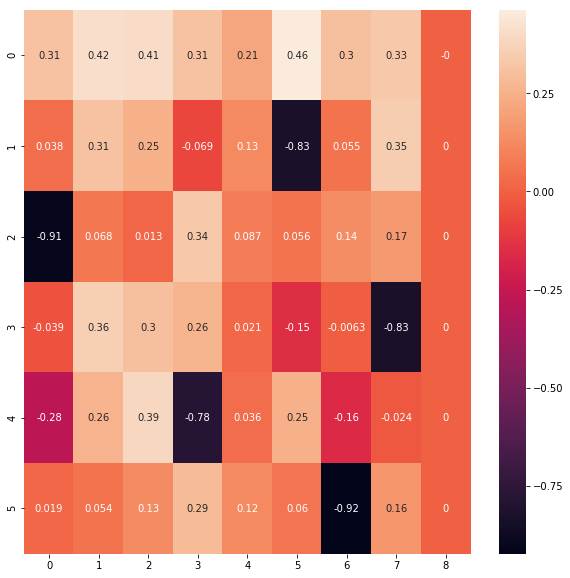

In [292]:
plt.figure(figsize=(10,10))
sns.heatmap(pca.components_,annot = True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [270]:
ratings = pd.read_csv('jokes.csv')
ratings.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [271]:
df = ratings.head(200).drop('NumJokes', axis=1)
df.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [272]:
df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [273]:
for i in df.columns:
    for j in df[i]:
        if(j == 99):
            df[i]=df[i].replace(j,0)

In [274]:
df[df == 99].head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [275]:
sc = StandardScaler()
ratings_diff =  sc.fit_transform(df)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [284]:
data_df = pd.DataFrame(ratings_diff)

In [286]:
final_top_10 = data_df.mean().sort_values(ascending = False)

In [287]:
final_top_10.head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64